Saved plot to Perceptual_Skills_(%_of_Questions).svg
Saved plot to Reasoning_Skills_(%_of_Questions).svg


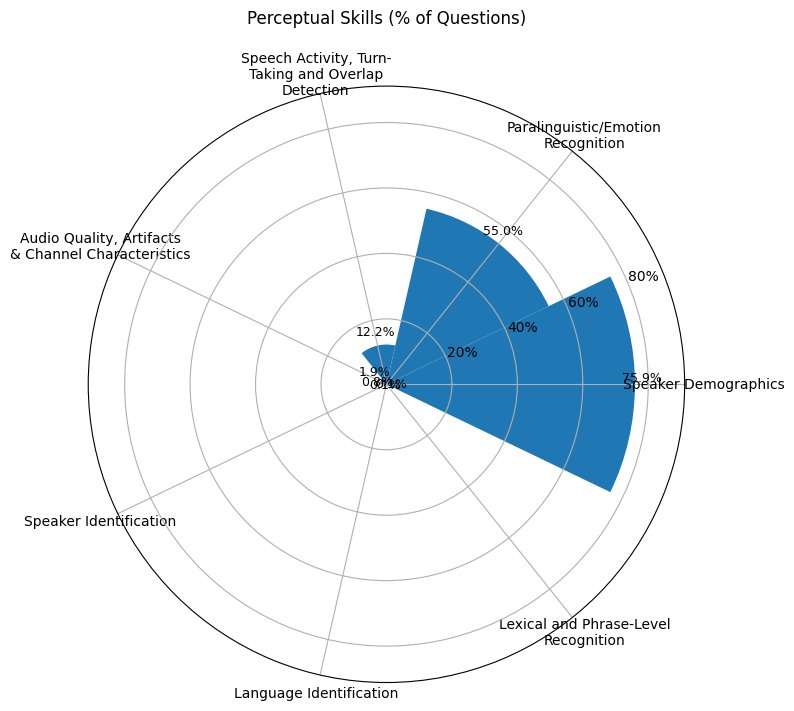

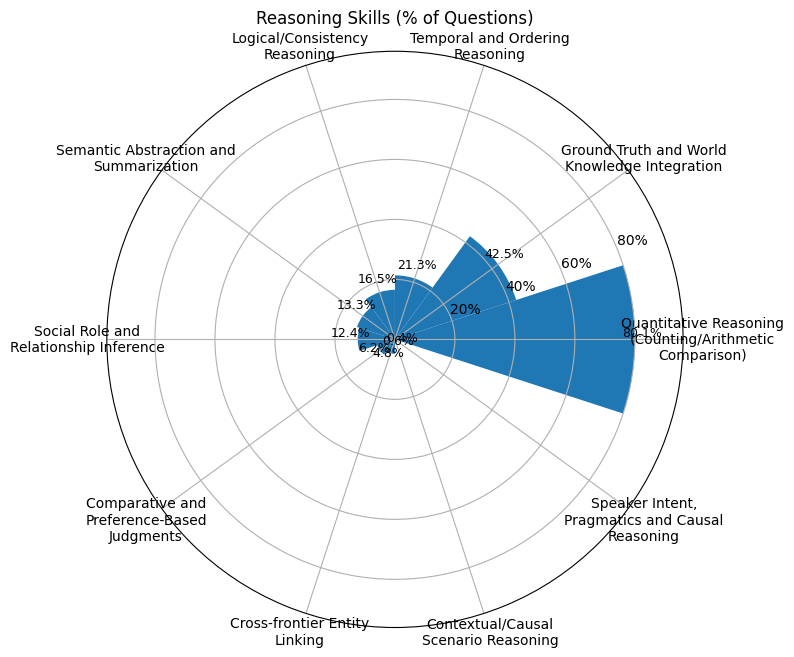

In [3]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from collections import Counter
from matplotlib.ticker import FuncFormatter

# Path to the augmented skills file
file_path = 'tagged_speech_questions.json'

def load_entries(path):
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    if isinstance(raw, dict):
        entries = list(raw.values())
    elif isinstance(raw, list):
        entries = raw
    else:
        raise ValueError("Unsupported JSON structure: expected list or dict.")
    return entries

def extract_skill_lists(entry):
    # Support both old keys and new nested structure
    perceptual = []
    reasoning = []
    if 'tags' in entry:
        perceptual = entry['tags'].get('perceptual', []) or []
        reasoning = entry['tags'].get('reasoning', []) or []
    else:
        # fallback to older schema if present
        perceptual = entry.get('perceptual_skills', []) or []
        reasoning = entry.get('reasoning_skills', []) or []
    return perceptual, reasoning

def plot_circular(pct_dict, title):
    if not pct_dict:
        print(f"No data to plot for '{title}'.")
        return None, None
    # Sort for consistent ordering (descending percentage)
    items = sorted(pct_dict.items(), key=lambda kv: kv[1], reverse=True)
    labels, values = zip(*items)
    wrapped = [textwrap.fill(label, 25) for label in labels]
    N = len(labels)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    widths = 2 * np.pi / N

    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(projection='polar')
    bars = ax.bar(angles, values, width=widths, bottom=0.0)

    # Annotate each bar with its percentage value (optional)
    for angle, val in zip(angles, values):
        ax.text(angle, val + max(values)*0.03, f"{val:.1f}%", 
                ha='center', va='bottom', fontsize=9)

    # Format y-axis as percentages
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax.set_ylim(0, max(values) * 1.2)

    ax.set_xticks(angles)
    ax.set_xticklabels(wrapped)
    ax.set_title(title, pad=20)
    plt.tight_layout()
    filename = f"{title.replace(' ', '_')}.svg"
    plt.savefig(filename)
    print(f"Saved plot to {filename}")
    return fig, ax

if not os.path.isfile(file_path):
    print(f"Error: '{file_path}' not found. Please place it in the current directory.")
else:
    try:
        entries = load_entries(file_path)
    except Exception as e:
        print(f"Failed to load JSON: {e}")
        raise

    total_questions = len(entries)
    if total_questions == 0:
        print("No entries found in the JSON. Exiting.")
        exit(1)

    # Aggregate counts
    perc_counter = Counter()
    reas_counter = Counter()
    for entry in entries:
        perceptual, reasoning = extract_skill_lists(entry)
        for tag in set(perceptual):
            perc_counter[tag] += 1
        for tag in set(reasoning):
            reas_counter[tag] += 1

    # Convert to percentages
    perc_pct = {tag: count / total_questions * 100 for tag, count in perc_counter.items()}
    reas_pct = {tag: count / total_questions * 100 for tag, count in reas_counter.items()}

    fig1, ax1 = plot_circular(perc_pct, 'Perceptual Skills (% of Questions)')
    fig2, ax2 = plot_circular(reas_pct, 'Reasoning Skills (% of Questions)')
    plt.show()


Saved plot to speech_Perceptual_Skills_(%_of_Questions).svg
Saved plot to speech_Reasoning_Skills_(%_of_Questions).svg


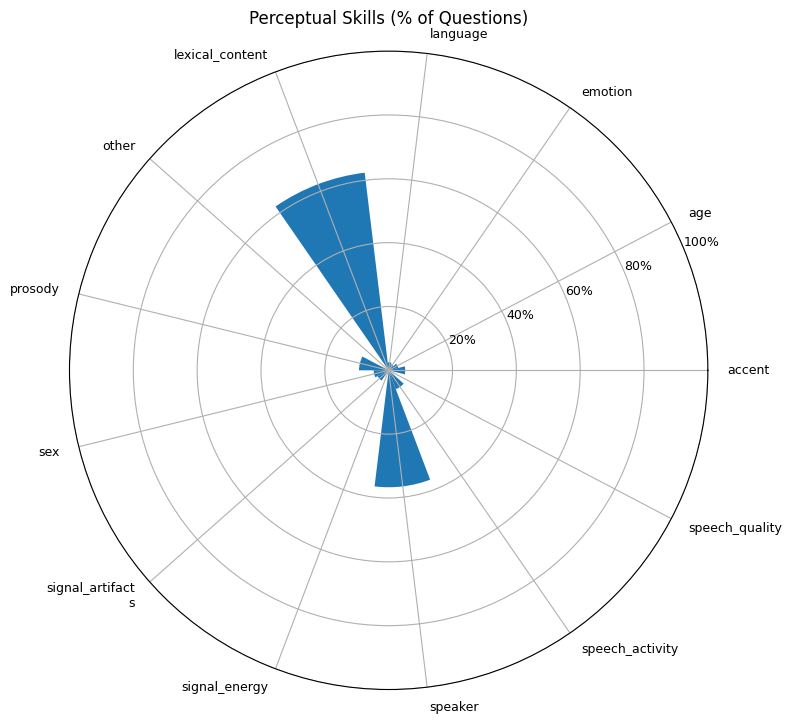

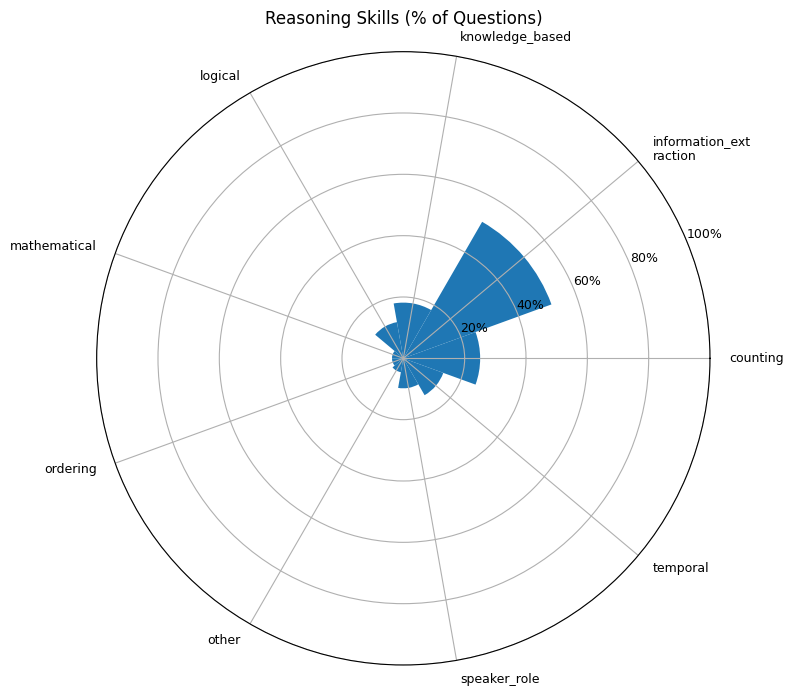

In [ ]:
# Jupyter Notebook Cell: Cleaned Circular Bar Plots for Perceptual & Reasoning Skills in "speech" Category

import os
import json
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from collections import Counter
from matplotlib.ticker import FuncFormatter

# Path to the concatenated JSON file
file_path = 'concatenated.json'  # adjust if needed

def load_entries(path):
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    if isinstance(raw, dict):
        entries = list(raw.values())
    elif isinstance(raw, list):
        entries = raw
    else:
        raise ValueError("Unsupported JSON structure: expected list or dict.")
    return entries

def extract_skill_lists(entry):
    if entry.get('category') != 'speech':
        return [], []
    perceptual = entry.get('perceptual_skills', []) or []
    reasoning = entry.get('reasoning_skills', []) or []
    if 'skills' in entry:
        perceptual = entry['skills'].get('perceptual_skills', perceptual) or []
        reasoning = entry['skills'].get('reasoning_skills', reasoning) or []
    return perceptual, reasoning

def plot_circular(pct_dict, title, out_prefix):
    if not pct_dict:
        print(f"No data to plot for '{title}'.")
        return None, None

    # Alphabetical order for consistency
    items = sorted(pct_dict.items(), key=lambda kv: kv[0].lower())
    labels, values = zip(*items)
    wrapped_labels = ['\n'.join(textwrap.wrap(label, 15)) for label in labels]
    N = len(labels)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    width = 2 * np.pi / N

    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(projection='polar')

    # Bars without individual annotations
    ax.bar(angles, values, width=width, bottom=0.0)

    # Radial axis formatting as percentage scale
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))
    max_val = max(values)
    ax.set_ylim(0, max_val * 1)

    # Set ticks and rotate/wrap labels so they align tangentially
    ax.set_xticks(angles)
    ax.set_xticklabels(wrapped_labels, fontsize=9)
    for lbl, angle in zip(ax.get_xticklabels(), angles):
        deg = np.degrees(angle)
        # Determine rotation so text is parallel to circle edge
        if 90 < deg < 270:
            lbl.set_rotation(deg + 180)
            lbl.set_ha('right')
        else:
            lbl.set_rotation(deg)
            lbl.set_ha('left')
        lbl.set_va('center')


    ax.set_title(title, pad=20)
    plt.tight_layout()
    filename = f"{out_prefix}_{title.replace(' ', '_')}.svg"
    plt.savefig(filename)
    print(f"Saved plot to {filename}")
    return fig, ax

# === Main ===
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"Error: '{file_path}' not found in working directory.")

entries = load_entries(file_path)
speech_entries = [e for e in entries if e.get('category') == 'speech']
total_questions = len(speech_entries)
if total_questions == 0:
    raise RuntimeError("No entries with category 'speech' found!")

perc_counter = Counter()
reas_counter = Counter()

for entry in speech_entries:
    perceptual, reasoning = extract_skill_lists(entry)
    for tag in set(perceptual):
        perc_counter[tag] += 1
    for tag in set(reasoning):
        reas_counter[tag] += 1

# Percentages
perc_pct = {tag: count / total_questions * 100 for tag, count in perc_counter.items()}
reas_pct = {tag: count / total_questions * 100 for tag, count in reas_counter.items()}

# Plot
fig1, ax1 = plot_circular(perc_pct, 'Perceptual Skills (% of Questions)', 'speech')
fig2, ax2 = plot_circular(reas_pct, 'Reasoning Skills (% of Questions)', 'speech')

plt.show()


Saved plot to speech_Perceptual_Skills_(%_of_Questions).svg
Saved plot to speech_Reasoning_Skills_(%_of_Questions).svg


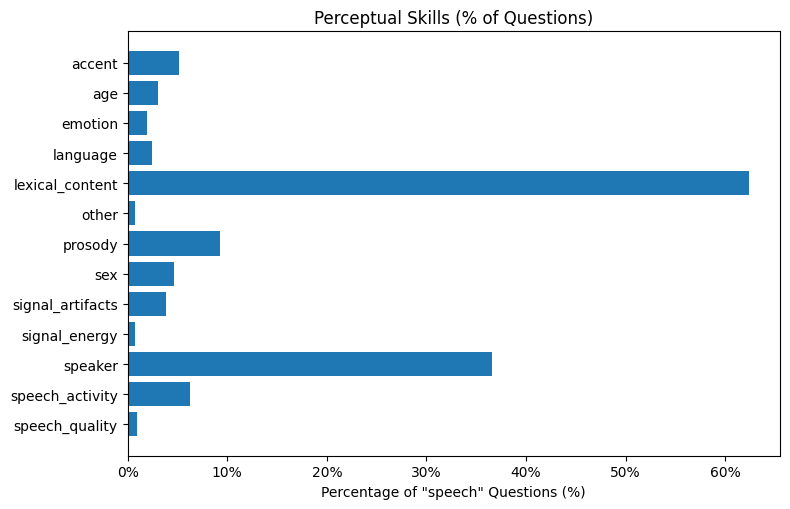

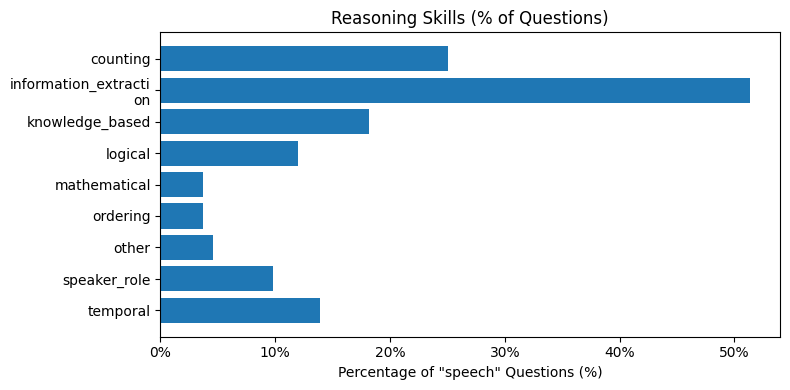

In [12]:
# Jupyter Notebook Cell: Regular Histogram Bar Charts for Perceptual & Reasoning Skills ("speech" category)

import os
import json
import matplotlib.pyplot as plt
import textwrap
from collections import Counter
from matplotlib.ticker import FuncFormatter

# Path to the concatenated JSON file
file_path = 'concatenated.json'  # adjust if needed

def load_entries(path):
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    if isinstance(raw, dict):
        entries = list(raw.values())
    elif isinstance(raw, list):
        entries = raw
    else:
        raise ValueError("Unsupported JSON structure: expected list or dict.")
    return entries

def extract_skill_lists(entry):
    if entry.get('category') != 'speech':
        return [], []
    perceptual = entry.get('perceptual_skills', []) or []
    reasoning = entry.get('reasoning_skills', []) or []
    if 'skills' in entry:  # nested alternative schema
        perceptual = entry['skills'].get('perceptual_skills', perceptual) or []
        reasoning = entry['skills'].get('reasoning_skills', reasoning) or []
    return perceptual, reasoning

def plot_histogram(pct_dict, title, out_prefix):
    if not pct_dict:
        print(f"No data to plot for '{title}'.")
        return None, None
    # Alphabetical order
    items = sorted(pct_dict.items(), key=lambda kv: kv[0].lower())
    labels, values = zip(*items)
    # Wrap labels if long
    wrapped = ['\n'.join(textwrap.wrap(lbl, 20)) for lbl in labels]

    fig, ax = plt.subplots(figsize=(8, max(4, len(labels)*0.4)))
    bars = ax.barh(wrapped, values)
    ax.set_xlabel('Percentage of "speech" Questions (%)')
    ax.set_title(title)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax.invert_yaxis()  # highest at top
    plt.tight_layout()
    filename = f"{out_prefix}_{title.replace(' ', '_')}.svg"
    plt.savefig(filename)
    print(f"Saved plot to {filename}")
    return fig, ax

# === Main ===
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"Error: '{file_path}' not found in working directory.")

entries = load_entries(file_path)
speech_entries = [e for e in entries if e.get('category') == 'speech']
total_questions = len(speech_entries)
if total_questions == 0:
    raise RuntimeError("No entries with category 'speech' found!")

perc_counter = Counter()
reas_counter = Counter()
for entry in speech_entries:
    perceptual, reasoning = extract_skill_lists(entry)
    for tag in set(perceptual):
        perc_counter[tag] += 1
    for tag in set(reasoning):
        reas_counter[tag] += 1

# Percentages
perc_pct = {tag: count / total_questions * 100 for tag, count in perc_counter.items()}
reas_pct = {tag: count / total_questions * 100 for tag, count in reas_counter.items()}

# Plot histograms
fig1, ax1 = plot_histogram(perc_pct, 'Perceptual Skills (% of Questions)', 'speech')
fig2, ax2 = plot_histogram(reas_pct, 'Reasoning Skills (% of Questions)', 'speech')

plt.show()


In [22]:
# === Main ===
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"Error: '{file_path}' not found in working directory.")

entries = load_entries(file_path)
speech_entries = [e for e in entries if e.get('category') == 'speech']
total_questions = len(speech_entries)
if total_questions == 0:
    raise RuntimeError("No entries with category 'speech' found!")

perc_counter = Counter()
reas_counter = Counter()
for entry in speech_entries:
    perceptual, reasoning = extract_skill_lists(entry)
    for tag in set(perceptual):
        perc_counter[tag] += 1
    for tag in set(reasoning):
        reas_counter[tag] += 1

# Prepare JSON result
result = {
    "perceptual_counts": dict(perc_counter),
    "perceptual_percentages": {tag: round(count / total_questions * 100, 2) for tag, count in perc_counter.items()},
    "reasoning_counts": dict(reas_counter),
    "reasoning_percentages": {tag: round(count / total_questions * 100, 2) for tag, count in reas_counter.items()},
    "total_questions": total_questions
}

# Output as formatted JSON
print(json.dumps(result, indent=2))


{
  "perceptual_counts": {
    "speaker": 367,
    "accent": 52,
    "prosody": 93,
    "lexical_content": 625,
    "age": 31,
    "emotion": 20,
    "sex": 47,
    "speech_activity": 63,
    "signal_energy": 7,
    "language": 25,
    "speech_quality": 9,
    "signal_artifacts": 39,
    "other": 7
  },
  "perceptual_percentages": {
    "speaker": 36.63,
    "accent": 5.19,
    "prosody": 9.28,
    "lexical_content": 62.38,
    "age": 3.09,
    "emotion": 2.0,
    "sex": 4.69,
    "speech_activity": 6.29,
    "signal_energy": 0.7,
    "language": 2.5,
    "speech_quality": 0.9,
    "signal_artifacts": 3.89,
    "other": 0.7
  },
  "reasoning_counts": {
    "speaker_role": 98,
    "counting": 251,
    "information_extraction": 515,
    "logical": 120,
    "temporal": 139,
    "knowledge_based": 182,
    "mathematical": 37,
    "ordering": 37,
    "other": 46
  },
  "reasoning_percentages": {
    "speaker_role": 9.78,
    "counting": 25.05,
    "information_extraction": 51.4,
    "logica

Saved perceptual skills plot to tagged_speech_Perceptual_Skills.svg
Saved reasoning skills plot to tagged_speech_Reasoning_Skills.svg


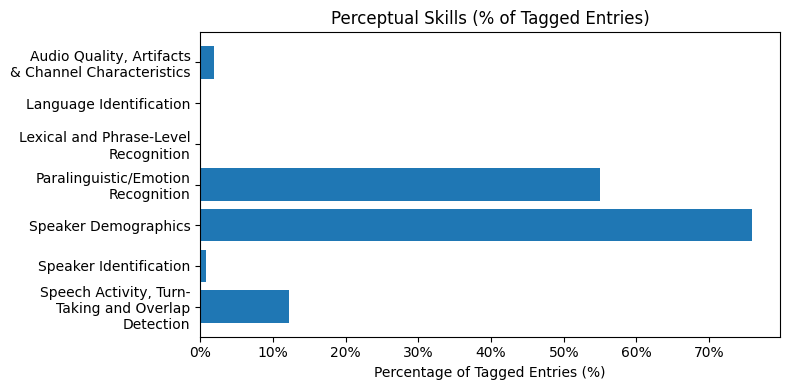

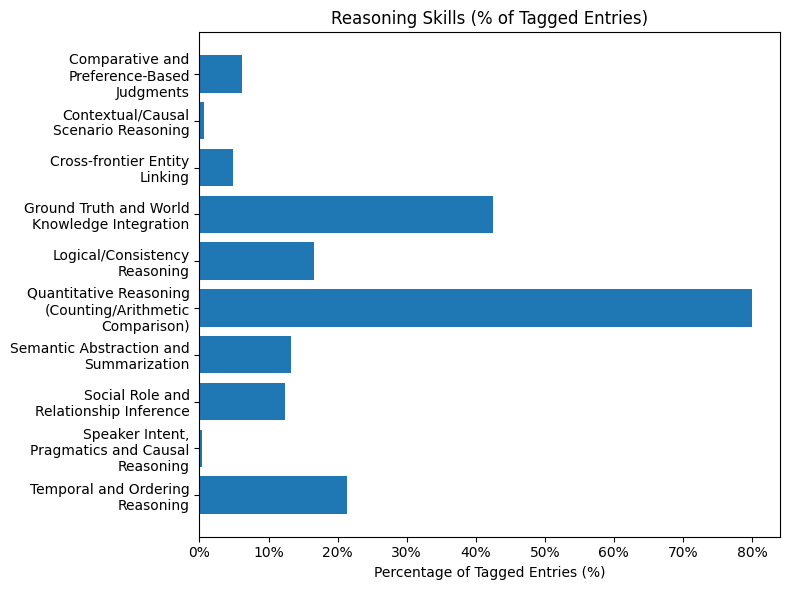

(<Figure size 800x400 with 1 Axes>, <Figure size 800x600 with 1 Axes>, 1143)

In [5]:
# Jupyter Notebook Cell: Function to Graph Perceptual & Reasoning Skills from tagged_speech_questions.json

import json
import os
import matplotlib.pyplot as plt
import textwrap
from collections import Counter
from matplotlib.ticker import FuncFormatter

def load_tagged_entries(path):
    """
    Load tagged_speech_questions.json which is expected to be a list or dict of entries
    with a 'tags' field containing 'perceptual' and 'reasoning' lists.
    """
    if not os.path.isfile(path):
        raise FileNotFoundError(f"File not found: {path}")
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    if isinstance(raw, dict):
        entries = list(raw.values())
    elif isinstance(raw, list):
        entries = raw
    else:
        raise ValueError("Unsupported JSON structure: expected list or dict.")
    return entries

def aggregate_tag_percentages(entries):
    """
    From entries with 'tags', count unique perceptual and reasoning tags per entry
    and return percentage of total entries for each tag.
    """
    perceptual_counter = Counter()
    reasoning_counter = Counter()
    total = 0
    for e in entries:
        tags = e.get('tags', {})
        perceptual = tags.get('perceptual', []) or []
        reasoning = tags.get('reasoning', []) or []
        if not perceptual and not reasoning:
            continue  # skip if neither present? still counts toward total if you prefer
        total += 1
        for p in set(perceptual):
            perceptual_counter[p] += 1
        for r in set(reasoning):
            reasoning_counter[r] += 1
    if total == 0:
        raise RuntimeError("No entries with perceptual/reasoning tags found.")
    perceptual_pct = {k: v / total * 100 for k, v in perceptual_counter.items()}
    reasoning_pct   = {k: v / total * 100 for k, v in reasoning_counter.items()}
    return perceptual_pct, reasoning_pct, total

def plot_skill_histogram(pct_dict, title, figsize=(8, 5)):
    """
    Horizontal bar chart of percentages. Labels are wrapped and sorted alphabetically.
    """
    if not pct_dict:
        print(f"No data for {title}")
        return None, None
    items = sorted(pct_dict.items(), key=lambda kv: kv[0].lower())
    labels, values = zip(*items)
    wrapped = ['\n'.join(textwrap.wrap(lbl, 25)) for lbl in labels]

    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(wrapped, values)
    ax.set_xlabel('Percentage of Tagged Entries (%)')
    ax.set_title(title)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax.invert_yaxis()  # highest at top
    plt.tight_layout()
    return fig, ax

def graph_tagged_speech(path='tagged_speech_questions.json', save_prefix=None):
    """
    Loads the tagged JSON, aggregates perceptual and reasoning skill percentages,
    and draws two horizontal histograms side by side.
    If save_prefix is provided, each figure is saved as <save_prefix>_<title>.svg.
    Returns (fig_perceptual, fig_reasoning, total_entries).
    """
    entries = load_tagged_entries(path)
    perceptual_pct, reasoning_pct, total = aggregate_tag_percentages(entries)

    fig_p, ax_p = plot_skill_histogram(perceptual_pct, 'Perceptual Skills (% of Tagged Entries)', figsize=(8, max(4, len(perceptual_pct)*0.3)))
    fig_r, ax_r = plot_skill_histogram(reasoning_pct, 'Reasoning Skills (% of Tagged Entries)', figsize=(8, max(6, len(reasoning_pct)*0.3)))

    if save_prefix:
        if fig_p:
            fname = f"{save_prefix}_Perceptual_Skills.svg"
            fig_p.savefig(fname)
            print(f"Saved perceptual skills plot to {fname}")
        if fig_r:
            fname = f"{save_prefix}_Reasoning_Skills.svg"
            fig_r.savefig(fname)
            print(f"Saved reasoning skills plot to {fname}")

    plt.show()
    return fig_p, fig_r, total

graph_tagged_speech('tagged_speech_questions.json', save_prefix='tagged_speech')


Saved perceptual skills plot to outputpresOG_perceptual.svg
Saved reasoning skills plot to outputpresOG_reasoning.svg


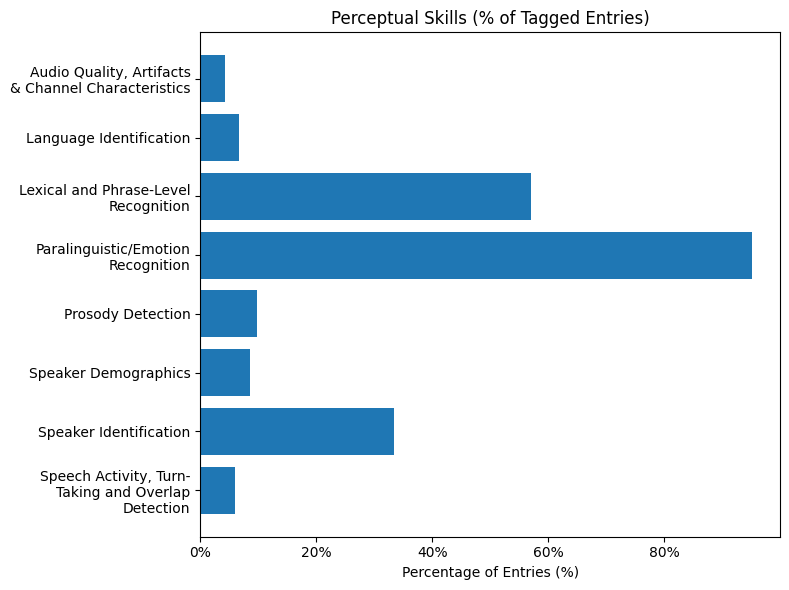

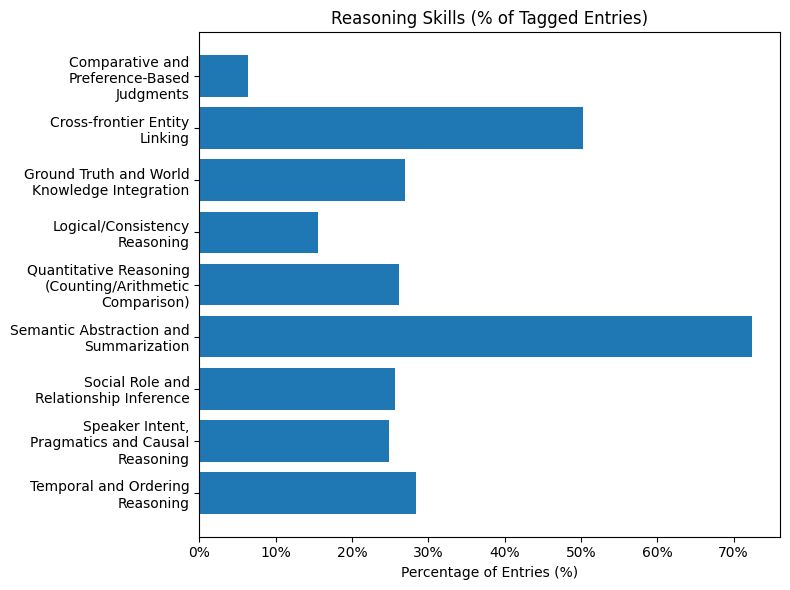

{'perceptual_fig': <Figure size 800x600 with 1 Axes>,
 'reasoning_fig': <Figure size 800x600 with 1 Axes>,
 'total_tagged_entries': 1097,
 'perceptual_pct': {'Speaker Demographics': 8.568824065633546,
  'Paralinguistic/Emotion Recognition': 95.16864175022789,
  'Prosody Detection': 9.753874202370099,
  'Speech Activity, Turn-Taking and Overlap Detection': 5.925250683682772,
  'Speaker Identification': 33.45487693710118,
  'Language Identification': 6.74567000911577,
  'Lexical and Phrase-Level Recognition': 56.97356426618049,
  'Audio Quality, Artifacts & Channel Characteristics': 4.193254329990884},
 'reasoning_pct': {'Cross-frontier Entity Linking': 50.319051959890615,
  'Speaker Intent, Pragmatics and Causal Reasoning': 24.79489516864175,
  'Temporal and Ordering Reasoning': 28.441203281677303,
  'Ground Truth and World Knowledge Integration': 26.98268003646308,
  'Logical/Consistency Reasoning': 15.587967183226983,
  'Social Role and Relationship Inference': 25.61531449407475,
  'C

In [3]:
# Jupyter Notebook Cell: Histogram of Perceptual & Reasoning Skills from tagged_skills_outputpresOG.json

import os
import json
import matplotlib.pyplot as plt
import textwrap
from collections import Counter
from matplotlib.ticker import FuncFormatter

def load_entries(path):
    """
    Load JSON that is either a list or dict of entries.
    """
    if not os.path.isfile(path):
        raise FileNotFoundError(f"File not found: {path}")
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    if isinstance(raw, dict):
        entries = list(raw.values())
    elif isinstance(raw, list):
        entries = raw
    else:
        raise ValueError("Unsupported JSON structure: expected list or dict.")
    return entries

def aggregate_skill_percentages(entries):
    """
    Count unique perceptual_skills and reasoning_skills per entry (only if present)
    and return percentage of total entries that include each skill.
    """
    perc_counter = Counter()
    reas_counter = Counter()
    total = 0
    for e in entries:
        perceptual = e.get('perceptual_skills', []) or []
        reasoning  = e.get('reasoning_skills', []) or []
        if not perceptual and not reasoning:
            continue  # skip entries with neither (optional; they won't affect denominators)
        total += 1
        for p in set(perceptual):
            perc_counter[p] += 1
        for r in set(reasoning):
            reas_counter[r] += 1
    if total == 0:
        raise RuntimeError("No entries with perceptual or reasoning skills found.")
    perc_pct = {k: v / total * 100 for k, v in perc_counter.items()}
    reas_pct = {k: v / total * 100 for k, v in reas_counter.items()}
    return perc_pct, reas_pct, total

def plot_horizontal_hist(pct_dict, title, figsize=None):
    """
    Plot a horizontal bar chart of the percentage dictionary, alphabetically ordered.
    """
    if not pct_dict:
        print(f"No data to plot for '{title}'.")
        return None, None
    items = sorted(pct_dict.items(), key=lambda kv: kv[0].lower())
    labels, values = zip(*items)
    wrapped = ['\n'.join(textwrap.wrap(lbl, 25)) for lbl in labels]

    if figsize is None:
        figsize = (8, max(6, len(labels) * 0.35))
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(wrapped, values)
    ax.set_xlabel('Percentage of Entries (%)')
    ax.set_title(title)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax.invert_yaxis()  # highest percentage on top
    plt.tight_layout()
    return fig, ax

def graph_tagged_skills(path='tagged_skills_outputpresOG.json', save_prefix=None):
    entries = load_entries(path)
    perceptual_pct, reasoning_pct, total = aggregate_skill_percentages(entries)

    fig_p, ax_p = plot_horizontal_hist(perceptual_pct, 'Perceptual Skills (% of Tagged Entries)')
    fig_r, ax_r = plot_horizontal_hist(reasoning_pct, 'Reasoning Skills (% of Tagged Entries)')

    if save_prefix:
        if fig_p:
            fname = f"{save_prefix}_perceptual.svg"
            fig_p.savefig(fname)
            print(f"Saved perceptual skills plot to {fname}")
        if fig_r:
            fname = f"{save_prefix}_reasoning.svg"
            fig_r.savefig(fname)
            print(f"Saved reasoning skills plot to {fname}")

    plt.show()
    return {
        "perceptual_fig": fig_p,
        "reasoning_fig": fig_r,
        "total_tagged_entries": total,
        "perceptual_pct": perceptual_pct,
        "reasoning_pct": reasoning_pct,
    }

graph_tagged_skills('tagged_skills_outputpresOG.json', save_prefix='outputpresOG')


Saved perceptual skills plot to outputpresOG_perceptual.svg
Saved reasoning skills plot to outputpresOG_reasoning.svg


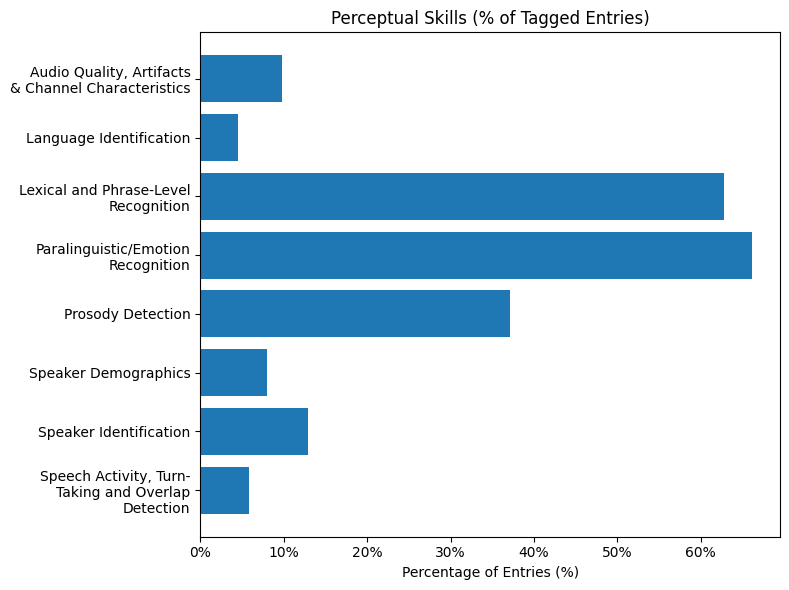

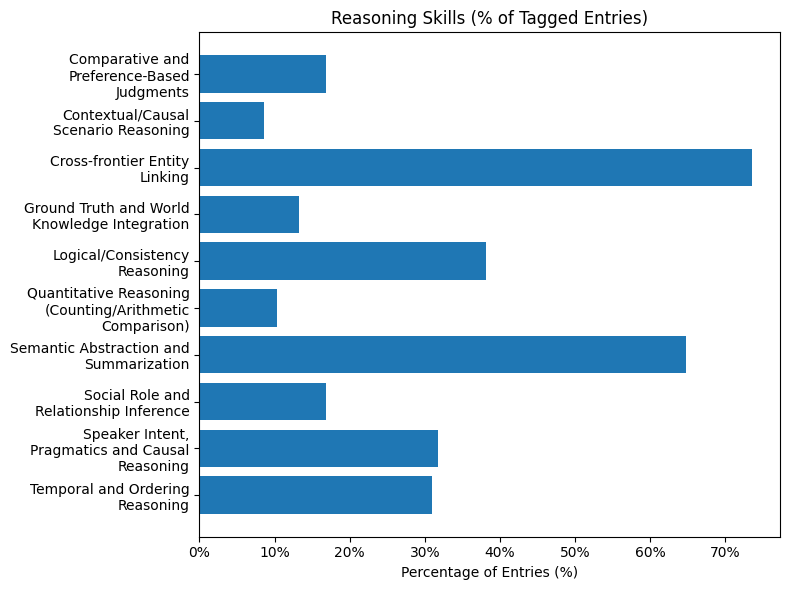

{'perceptual_fig': <Figure size 800x600 with 1 Axes>,
 'reasoning_fig': <Figure size 800x600 with 1 Axes>,
 'total_tagged_entries': 5000,
 'perceptual_pct': {'Audio Quality, Artifacts & Channel Characteristics': 9.86,
  'Paralinguistic/Emotion Recognition': 66.18,
  'Prosody Detection': 37.16,
  'Lexical and Phrase-Level Recognition': 62.739999999999995,
  'Speaker Identification': 12.86,
  'Speaker Demographics': 8.04,
  'Speech Activity, Turn-Taking and Overlap Detection': 5.84,
  'Language Identification': 4.54},
 'reasoning_pct': {'Comparative and Preference-Based Judgments': 16.82,
  'Cross-frontier Entity Linking': 73.58,
  'Social Role and Relationship Inference': 16.8,
  'Semantic Abstraction and Summarization': 64.72,
  'Ground Truth and World Knowledge Integration': 13.18,
  'Logical/Consistency Reasoning': 38.14,
  'Temporal and Ordering Reasoning': 30.94,
  'Speaker Intent, Pragmatics and Causal Reasoning': 31.72,
  'Quantitative Reasoning (Counting/Arithmetic Comparison)':

In [4]:
# Jupyter Notebook Cell: Histogram of Perceptual & Reasoning Skills from tagged_skills_outputpresOG.json

import os
import json
import matplotlib.pyplot as plt
import textwrap
from collections import Counter
from matplotlib.ticker import FuncFormatter

def load_entries(path):
    """
    Load JSON that is either a list or dict of entries.
    """
    if not os.path.isfile(path):
        raise FileNotFoundError(f"File not found: {path}")
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    if isinstance(raw, dict):
        entries = list(raw.values())
    elif isinstance(raw, list):
        entries = raw
    else:
        raise ValueError("Unsupported JSON structure: expected list or dict.")
    return entries

def aggregate_skill_percentages(entries):
    """
    Count unique perceptual_skills and reasoning_skills per entry (only if present)
    and return percentage of total entries that include each skill.
    """
    perc_counter = Counter()
    reas_counter = Counter()
    total = 0
    for e in entries:
        perceptual = e.get('perceptual_skills', []) or []
        reasoning  = e.get('reasoning_skills', []) or []
        if not perceptual and not reasoning:
            continue  # skip entries with neither (optional; they won't affect denominators)
        total += 1
        for p in set(perceptual):
            perc_counter[p] += 1
        for r in set(reasoning):
            reas_counter[r] += 1
    if total == 0:
        raise RuntimeError("No entries with perceptual or reasoning skills found.")
    perc_pct = {k: v / total * 100 for k, v in perc_counter.items()}
    reas_pct = {k: v / total * 100 for k, v in reas_counter.items()}
    return perc_pct, reas_pct, total

def plot_horizontal_hist(pct_dict, title, figsize=None):
    """
    Plot a horizontal bar chart of the percentage dictionary, alphabetically ordered.
    """
    if not pct_dict:
        print(f"No data to plot for '{title}'.")
        return None, None
    items = sorted(pct_dict.items(), key=lambda kv: kv[0].lower())
    labels, values = zip(*items)
    wrapped = ['\n'.join(textwrap.wrap(lbl, 25)) for lbl in labels]

    if figsize is None:
        figsize = (8, max(6, len(labels) * 0.35))
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(wrapped, values)
    ax.set_xlabel('Percentage of Entries (%)')
    ax.set_title(title)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax.invert_yaxis()  # highest percentage on top
    plt.tight_layout()
    return fig, ax

def graph_tagged_skills(path='tagged_skills_outputpresOG.json', save_prefix=None):
    entries = load_entries(path)
    perceptual_pct, reasoning_pct, total = aggregate_skill_percentages(entries)

    fig_p, ax_p = plot_horizontal_hist(perceptual_pct, 'Perceptual Skills (% of Tagged Entries)')
    fig_r, ax_r = plot_horizontal_hist(reasoning_pct, 'Reasoning Skills (% of Tagged Entries)')

    if save_prefix:
        if fig_p:
            fname = f"{save_prefix}_perceptual.svg"
            fig_p.savefig(fname)
            print(f"Saved perceptual skills plot to {fname}")
        if fig_r:
            fname = f"{save_prefix}_reasoning.svg"
            fig_r.savefig(fname)
            print(f"Saved reasoning skills plot to {fname}")

    plt.show()
    return {
        "perceptual_fig": fig_p,
        "reasoning_fig": fig_r,
        "total_tagged_entries": total,
        "perceptual_pct": perceptual_pct,
        "reasoning_pct": reasoning_pct,
    }

graph_tagged_skills('tagged_skills_MMSU.json', save_prefix='outputpresOG')


Saved perceptual skills plot to boop_perceptual.svg
Saved reasoning skills plot to boop_reasoning.svg


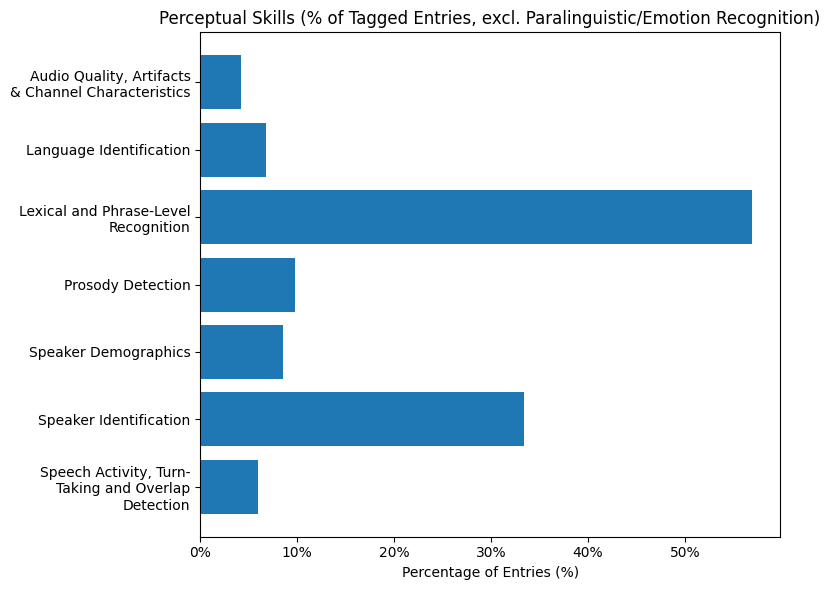

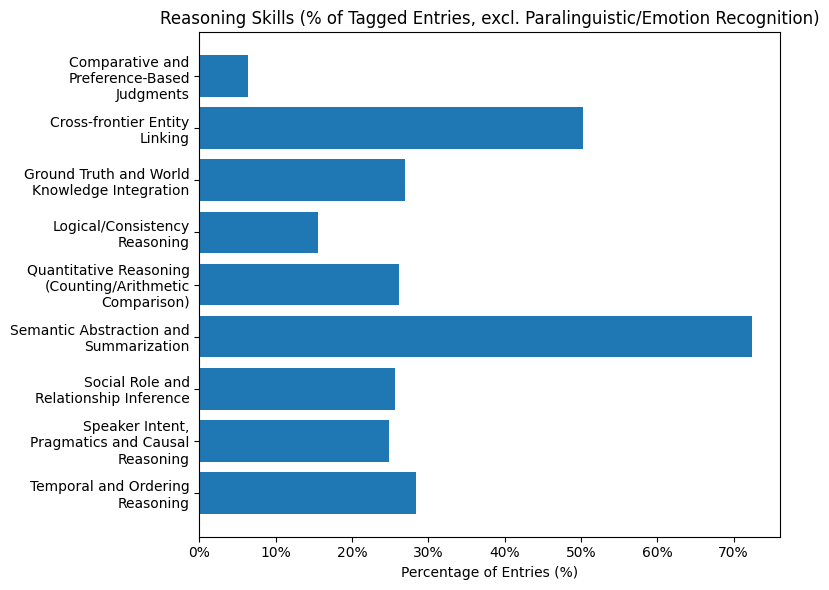

{'perceptual_fig': <Figure size 800x600 with 1 Axes>,
 'reasoning_fig': <Figure size 800x600 with 1 Axes>,
 'total_tagged_entries': 1097,
 'perceptual_pct': {'Speaker Demographics': 8.568824065633546,
  'Prosody Detection': 9.753874202370099,
  'Speech Activity, Turn-Taking and Overlap Detection': 5.925250683682772,
  'Speaker Identification': 33.45487693710118,
  'Language Identification': 6.74567000911577,
  'Lexical and Phrase-Level Recognition': 56.97356426618049,
  'Audio Quality, Artifacts & Channel Characteristics': 4.193254329990884},
 'reasoning_pct': {'Cross-frontier Entity Linking': 50.319051959890615,
  'Speaker Intent, Pragmatics and Causal Reasoning': 24.79489516864175,
  'Ground Truth and World Knowledge Integration': 26.98268003646308,
  'Temporal and Ordering Reasoning': 28.441203281677303,
  'Logical/Consistency Reasoning': 15.587967183226983,
  'Social Role and Relationship Inference': 25.61531449407475,
  'Comparative and Preference-Based Judgments': 6.3810391978122

In [3]:
# Jupyter Notebook Cell: Histogram of Perceptual & Reasoning Skills (excluding Paralinguistic/Emotion Recognition)

import os
import json
import matplotlib.pyplot as plt
import textwrap
from collections import Counter
from matplotlib.ticker import FuncFormatter

EXCLUDE_SKILLS = {"Paralinguistic/Emotion Recognition"}

def load_entries(path):
    if not os.path.isfile(path):
        raise FileNotFoundError(f"File not found: {path}")
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    if isinstance(raw, dict):
        entries = list(raw.values())
    elif isinstance(raw, list):
        entries = raw
    else:
        raise ValueError("Unsupported JSON structure: expected list or dict.")
    return entries

def aggregate_skill_percentages(entries, exclude=None):
    perceptual_counter = Counter()
    reasoning_counter = Counter()
    total = 0
    for e in entries:
        perceptual = e.get('perceptual_skills', []) or []
        reasoning  = e.get('reasoning_skills', []) or []
        # skip if neither present
        if not perceptual and not reasoning:
            continue
        # apply exclusion
        if exclude:
            perceptual = [p for p in perceptual if p not in exclude]
            reasoning = [r for r in reasoning if r not in exclude]
        # if after exclusion both empty, still count toward denominator? keep original behavior:
        total += 1
        for p in set(perceptual):
            perceptual_counter[p] += 1
        for r in set(reasoning):
            reasoning_counter[r] += 1
    if total == 0:
        raise RuntimeError("No entries with perceptual or reasoning skills found.")
    perc_pct = {k: v / total * 100 for k, v in perceptual_counter.items()}
    reas_pct = {k: v / total * 100 for k, v in reasoning_counter.items()}
    return perc_pct, reas_pct, total

def plot_horizontal_hist(pct_dict, title, figsize=None):
    if not pct_dict:
        print(f"No data to plot for '{title}'.")
        return None, None
    items = sorted(pct_dict.items(), key=lambda kv: kv[0].lower())
    labels, values = zip(*items)
    wrapped = ['\n'.join(textwrap.wrap(lbl, 25)) for lbl in labels]
    if figsize is None:
        figsize = (8, max(6, len(labels) * 0.35))
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(wrapped, values)
    ax.set_xlabel('Percentage of Entries (%)')
    ax.set_title(title)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax.invert_yaxis()
    plt.tight_layout()
    return fig, ax

def graph_tagged_skills(path='tagged_skills_outputpresOG.json', save_prefix=None):
    entries = load_entries(path)
    perceptual_pct, reasoning_pct, total = aggregate_skill_percentages(entries, exclude=EXCLUDE_SKILLS)

    fig_p, ax_p = plot_horizontal_hist(perceptual_pct, 'Perceptual Skills (% of Tagged Entries, excl. Paralinguistic/Emotion Recognition)')
    fig_r, ax_r = plot_horizontal_hist(reasoning_pct, 'Reasoning Skills (% of Tagged Entries, excl. Paralinguistic/Emotion Recognition)')

    if save_prefix:
        if fig_p:
            fname = f"{save_prefix}_perceptual.svg"
            fig_p.savefig(fname)
            print(f"Saved perceptual skills plot to {fname}")
        if fig_r:
            fname = f"{save_prefix}_reasoning.svg"
            fig_r.savefig(fname)
            print(f"Saved reasoning skills plot to {fname}")

    plt.show()
    return {
        "perceptual_fig": fig_p,
        "reasoning_fig": fig_r,
        "total_tagged_entries": total,
        "perceptual_pct": perceptual_pct,
        "reasoning_pct": reasoning_pct,
    }

# Example usage:
graph_tagged_skills('tagged_skills_MMAUpro.json', save_prefix='boop')


Saved spider chart to perceptual_skills_spider.svg


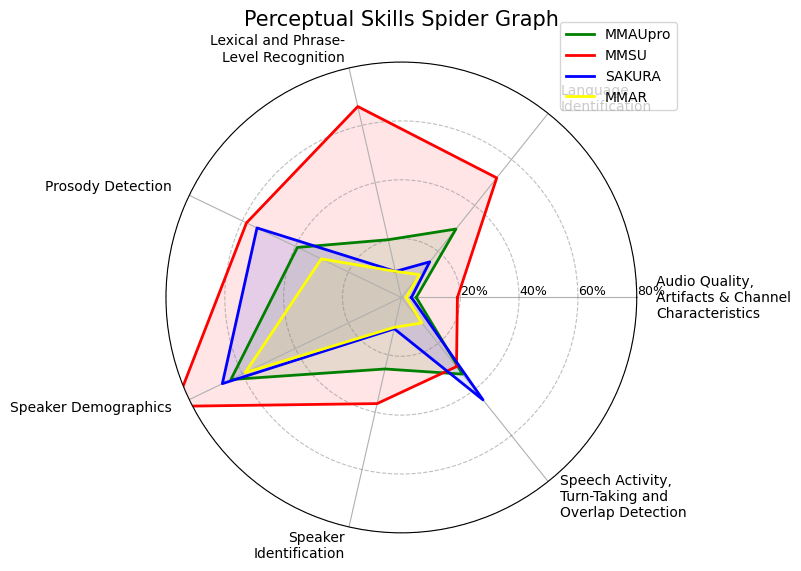

Saved spider chart to reasoning_skills_spider.svg


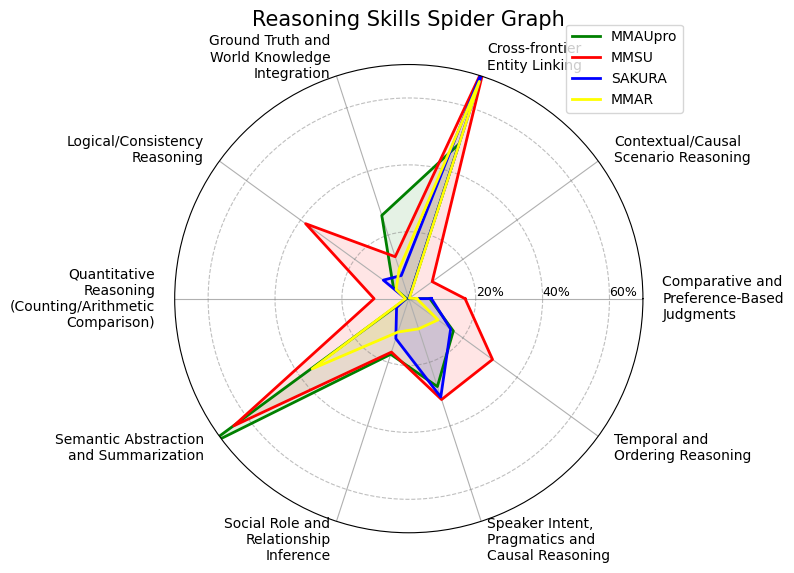

In [26]:
# Jupyter Notebook Cell: Spider Graph of Perceptual & Reasoning Skills (excluding Paralinguistic/Emotion Recognition)

import os
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import textwrap

EXCLUDE_SKILLS = {"Paralinguistic/Emotion Recognition"}

def load_entries(path):
    with open(path, 'r', encoding='utf-8') as f:
        raw = json.load(f)
    return raw.values() if isinstance(raw, dict) else raw

def aggregate_skill_percentages(entries, exclude=None):
    perceptual_counter = Counter()
    reasoning_counter = Counter()
    total = 0
    for e in entries:
        perceptual = [p for p in (e.get('perceptual_skills', []) or []) if p not in exclude]
        reasoning = [r for r in (e.get('reasoning_skills', []) or []) if r not in exclude]
        if perceptual or reasoning:
            total += 1
        perceptual_counter.update(set(perceptual))
        reasoning_counter.update(set(reasoning))

    perc_pct = {k: v / total * 100 for k, v in perceptual_counter.items()}
    reas_pct = {k: v / total * 100 for k, v in reasoning_counter.items()}
    return perc_pct, reas_pct

def plot_spider_chart(data_dicts, labels, title, colors, save_path=None, ylim_max=100):
    skill_labels = sorted({skill for data_dict in data_dicts for skill in data_dict})
    num_vars = len(skill_labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for data_dict, label, color in zip(data_dicts, labels, colors):
        values = [data_dict.get(skill, 0) for skill in skill_labels]
        values += values[:1]
        ax.fill(angles, values, alpha=0.1, color=color)
        ax.plot(angles, values, linewidth=2, label=label, color=color)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])

    ax.set_rlabel_position(0)  # Put radial labels at the top
    ax.set_yticks([20, 40, 60, 80, 100])  # You can change or extend this list
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=9)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)
    ax.set_ylim(0, ylim_max)

    wrapped_labels = ['\n'.join(textwrap.wrap(skill, 20)) for skill in skill_labels]
    ax.set_xticklabels(wrapped_labels, fontsize=10)

    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
        rotation = np.degrees(angle)
        if rotation <= 90 or rotation >= 270:
            label.set_rotation(rotation)
            label.set_ha('left')
        else:
            label.set_rotation(rotation + 180)
            label.set_ha('right')
        label.set_rotation_mode('anchor')

    ax.set_title(title, size=15, position=(0.5, 1.1), ha='center')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.tight_layout()

    if save_path:
        fig.savefig(save_path, format='svg')
        print(f"Saved spider chart to {save_path}")

    plt.show()

def graph_tagged_skills_spider(paths=['tagged_skills_MMAUpro.json', 'tagged_skills_MMSU.json'], labels=['MMAUpro', 'MMSU']):
    perceptual_data = []
    reasoning_data = []

    for path in paths:
        entries = load_entries(path)
        perc_pct, reas_pct = aggregate_skill_percentages(entries, exclude=EXCLUDE_SKILLS)
        perceptual_data.append(perc_pct)
        reasoning_data.append(reas_pct)

    colors = ['green', 'red', 'blue', 'yellow']

    plot_spider_chart(perceptual_data, labels, 'Perceptual Skills Spider Graph', colors[:len(labels)], save_path='perceptual_skills_spider.svg', ylim_max=80)
    plot_spider_chart(reasoning_data, labels, 'Reasoning Skills Spider Graph', colors[:len(labels)], save_path='reasoning_skills_spider.svg', ylim_max=70)

# Example usage:
graph_tagged_skills_spider(['tagged_ALL.json', 'tagged_skills_MMSU.json', 'tagged_sakura_output.json', 'tagged_mmar_output.json'], ['MMAUpro', 'MMSU', 'SAKURA', 'MMAR'],)
